## Linear regression

$\mathcal X=\mathbb R^d$, $\mathcal Y=\mathbb R$,
$$ \|w\|_1:=\sum_{i=1}^d |w_i|,\quad \|w\|_2:=\sqrt{\sum_{i=1}^d |w_i|^2},$$
$$\mathcal H=\{x\mapsto h(x)=\langle w,x\rangle+b\},$$
+ Ordinary linear regression
$$ L_S(h)=\frac{1}{m}\sum_{i=1}^m(\langle w,x_i\rangle+b-y_i)^2\to\min_{w,b}$$
+ Ridge regression
$$ L_S(h)+\lambda\|w\|_2^2\to\min_{w,b}$$
+ Lasso
$$ L_S(h)+\lambda\|w\|_1\to\min_{w,b}$$
+ Elastic net
$$ L_S(h)+\lambda_1\|w\|_2^2+\lambda_2\|w\|_1\to\min_{w,b}$$

Assume that samples correspond to the values of a 3rd order polynomial perturbed by a Gaussian noise:
$$ y_i=x_i^3-5 x_i^2+3 x_i+1+\xi_i,\quad \xi_i\sim N(0,1),\quad x_i\sim U(-1,5)$$
$i\in\{1,\dots,m\}$, $m=30$.

**1. Plot the graph of the unperturbed function and the scatter plot of $(x_i,y_i)$.**

Text(0, 0.5, 'y')

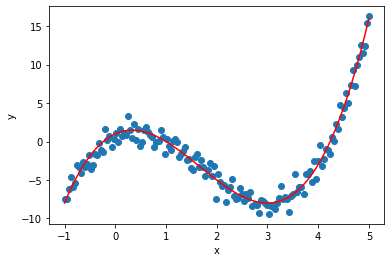

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
m = 150
x = np.linspace(-1, 5, m)
ksi = np.random.normal(0,1,m)
y_unperturbed = x**3 - 5*x**2 + 3*x + 1
y_scatter = y_unperturbed + ksi

fig, axes = plt.subplots(figsize=(6, 4))
axes.plot(x, y_unperturbed, color = 'red')
axes.scatter(x,y_scatter)
axes.set_xlabel('x')
axes.set_ylabel('y')

Text(0, 0.5, 'y')

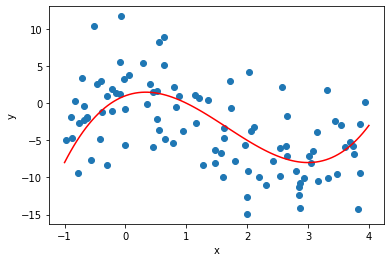

### Ordinary linear regression
Consider an extended set of features: $\mathbf{x}=(x,x^2,\dots,x^d)$ (`PolynomialFeatures`) and the correspondent linear regression problem:
$$ L_S(h)=\frac{1}{m}\sum_{i=1}^m(\langle\mathbf{w},\mathbf{x}_i\rangle+b-y_i)^2\to\min_{\mathbf{w},b}$$
The hypothesis class
$$\mathcal H_d=\{\mathbf{x}\mapsto h(\mathbf{x})=\langle\mathbf{w},\mathbf{x}\rangle+b\},$$
depends on the hyperparameter $d$. Consider the training errors
$$ \psi(d)=\inf_{\mathbf{w},b} L_S(h)$$
and average cross-validation errors 
$$ \overline\psi(d)=\frac{1}{k}\sum_{i=1}^k\psi_i(d),\quad \psi_i(d)=\inf_{\mathbf{w},b} L_{S\backslash S_i}(h)$$
for different values of $d$. Here $(S_1,\dots,S_d)$ is a partition of $S$, considered in the cross-validation. 

**2. Find $d$ with the best average cross-validation score.** 

Text(0, 0.5, 'errors')

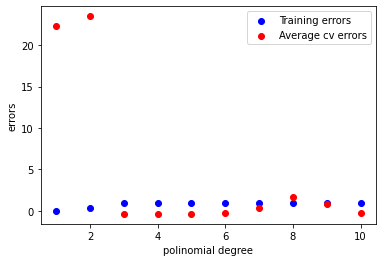

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
d = np.arange(1,11)
y = y_scatter
train = []
cv_err = []
x = np.linspace(-1,5,m).reshape(-1,1)

for i in d:
    
    Polynom = PolynomialFeatures(i, include_bias=False)
    p = Polynom.fit_transform(x)
    scores = cross_val_score(LinearRegression(),p,y,cv=10)
    
    train_this = np.mean(-scores)
    train.append(train_this)
    
    cv_err_this = LinearRegression().fit(p,y)
    cv_err_this = cv_err_this.score(p,y)
    cv_err.append(cv_err_this)
    

fig, axes = plt.subplots(figsize=(6, 4))
axes.scatter(d,cv_err, color ='blue')
axes.scatter(d,train, color ='red')
axes.legend(['Training errors','Average cv errors'], loc = 1)
axes.set_xlabel('polinomial degree')
axes.set_ylabel('errors')

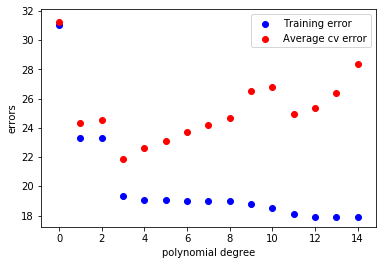

**3. (a) Compute the training error of this predictor for the RMSE (root mean square error) evaluation metrics. Compare with the standard deviation of the data. (b) By the means of scatter plots compare the coefficients of the best predictor and the original coefficients.** 

Best degree: 3
RMSE for the regression predictor with the best d: 0.9327432863937969


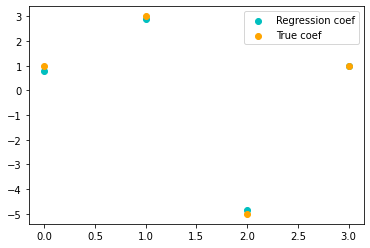

In [3]:
from sklearn.metrics import mean_squared_error
d = 3
Polynom = PolynomialFeatures(d, include_bias = False)
p = Polynom.fit_transform(x)
reg = LinearRegression()
reg.fit(p, y)

regression_coef = []
regression_coef.extend([reg.intercept_])
regression_coef.extend(reg.coef_)
print("Best degree:",np.argmin(regression_coef)+1)
rmse = mean_squared_error(reg.predict(p), y, squared=False)
print("RMSE for the regression predictor with the best d:",rmse)

true_coef = []
for i in range(len(regression_coef)):
    true_coef.append(round(regression_coef[i]))
n = [0,1,2,3]

fig, axes = plt.subplots(figsize=(6, 4))
axes.scatter(n,regression_coef, color='c')
axes.scatter(n,true_coef, color='orange')
axes.legend(['Regression coef','True coef'])


Best degree: 3
RMSE for the regression predictor with the best d: 4.394499627044507


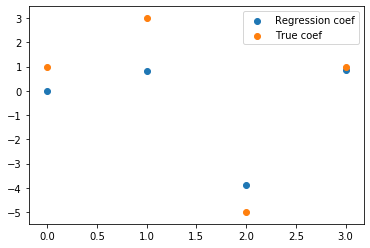

**4. Show the graphs of the predictors for d=3 and d=10 along with the unperturbed original function.**

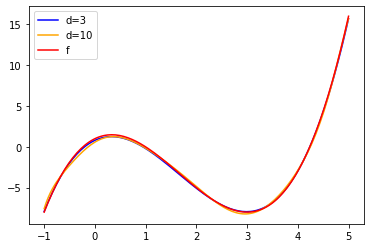

In [4]:
d = 10
Polynom = PolynomialFeatures(d, include_bias = False)
p10 = Polynom.fit_transform(x)
reg = LinearRegression()
reg.fit(p10, y)
regression_coef_10 = []
regression_coef_10.extend([reg.intercept_])
regression_coef_10.extend(reg.coef_)
graph_3 = np.polynomial.Polynomial(regression_coef)
graph_10 = np.polynomial.Polynomial(regression_coef_10)

fig, axes = plt.subplots(figsize=(6, 4))
axes.plot(x,graph_3(x), color = 'blue')
axes.plot(x,graph_10(x), color = 'orange')
axes.plot(x,y_unperturbed, 'r')
axes.legend(['d=3','d=10','f'])

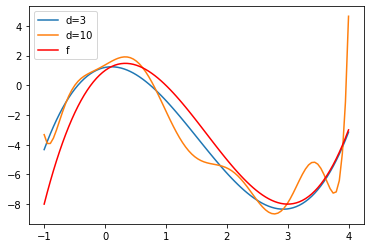

### Ridge regression
Objective function in scikit-learn:
$$ m\cdot L_S(h)+\alpha\|w\|_2^2$$
**5. (a) Take a class polynomials, having a fixed large degree ($d=10$) and select the best regularization parameter $\alpha$. Compute the training error for the RMSE evaluation metrics for the best 
$\alpha$.**  

Consider log-scale for $\alpha$:
`alphas=np.logspace(a_1,a_2,N=50,endpoint=True,b=10.0)`: 
$$ z_i=a_1+\frac{a_2-a_1}{N-1}i,\quad i=0,\dots,N-1,$$
$$ \alpha_i=b^{z_i},\quad i=0,\dots,N-1.$$
Note that the difference
$$ \log_b \alpha_{i+1}-\log_b(\alpha_i)=z_{i+1}-z_i=\frac{a_2-a_1}{N-1}$$
is constant.

**5. (b) Show the dependence of the training and cross-validation errors on the regularization parameter**

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
a_1 = 0
a_2 = 3
alphas=np.logspace(a_1,a_2,num=50,endpoint=True)
alphas_grid = {'alpha' : alphas} 

d = 10
Polynom = PolynomialFeatures(d, include_bias = False)
p = Polynom.fit_transform(x)
grid = GridSearchCV(estimator=Ridge(), param_grid=alphas_grid, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
grid_result = grid.fit(p, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Best regularization parameter: 22.229964825261945
RMSE for the best Ridge regression predictor: 1.1899028811656664


Text(0, 0.5, 'Errors')

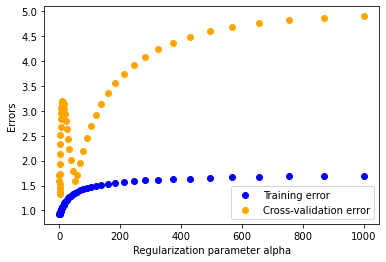

In [6]:
train = []
cv_err = []
for i in alphas:
    lr_reg = Ridge(alpha=i)
    lr_reg.fit(p, y)
    
    train_this = mean_squared_error(lr_reg.predict(p), y, squared=False)
    train.append(train_this)
    
    scores = cross_val_score(Ridge(alpha=i), p, y, cv=10 , scoring = 'neg_root_mean_squared_error')
    cv_err_this = -np.mean(scores)
    cv_err.append(cv_err_this)

best_regularization_parametr = grid_result.best_estimator_.alpha
rmse = mean_squared_error(grid_result.predict(p), y, squared=False)
print("Best regularization parameter:", best_regularization_parametr)
print("RMSE for the best Ridge regression predictor:", rmse)
    
fig, axes = plt.subplots(figsize=(6, 4))
axes.scatter(alphas,train, color='blue')
axes.scatter(alphas,cv_err, color='orange')
axes.legend(['Training error','Cross-validation error'])
axes.set_xlabel('Regularization parameter alpha')
axes.set_ylabel('Errors')

Best regularization parameter: 380.41453801905874
RMSE for the best Ridge regression predictor: 4.5302694295663395


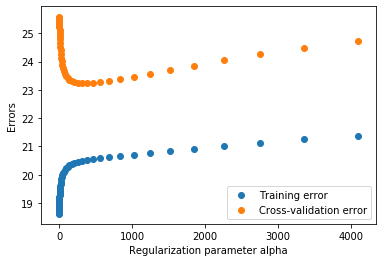

**6. Show the graphs of the best Ridge predictor along with the graph of the unperturbed original function.**

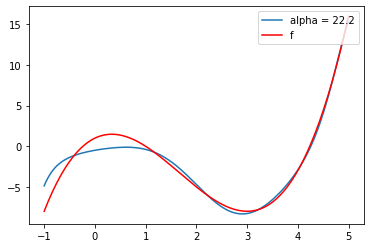

In [7]:
best_regularization_parametr = grid_result.best_estimator_.alpha
LR = Ridge(alpha=best_regularization_parametr)
LR.fit(p, y)
predict_alpha = LR.predict(p)

plt.plot(x,predict_alpha)
plt.plot(x,y_unperturbed,'r')
plt.legend(['alpha = '+str(round(best_regularization_parametr,1)),'f'], loc=1)
plt.show()

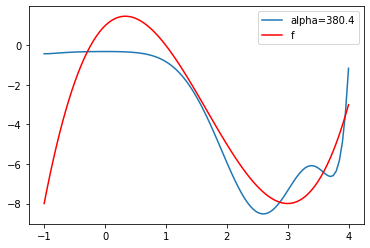

### Lasso regression
Objective function in scikit-learn:
$$ \frac{1}{2}L_S(h)+\alpha\|w\|_1.$$
**7. The problem is the same as 5, 6 for Ridge regression.**

In [8]:
from sklearn.linear_model import Lasso
a_1 = 0
a_2 = 2

alphas=np.logspace(a_1,a_2,num = 50,endpoint=True)
alphas_grid = {'alpha' : alphas}

grid = GridSearchCV(estimator=Lasso(), param_grid=alphas_grid, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
grid_result = grid.fit(p10, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406.1901663241905, tolerance: 0.38165062314629467
  model = cd_fast.enet_coordinate_descent(


C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290.9073917255409, tolerance: 0.38165062314629467
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181.28119124840106, tolerance: 0.368651205219889
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261.01814770915706, tolerance: 0.3725792182413772
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221.1982047353241, tolerance: 0.1507703545930783
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 302.64817210021204, tolerance: 0.38165062314629467
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200.4408453346374, tolerance: 0.368651205219889
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272.33869392645636, tolerance: 0.34903718560438823
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.21169028832196, tolerance: 0.31853692957900964
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285.3208258893216, tolerance: 0.34741197195651397
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281.6741794306166, tolerance: 0.34903718560438823
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296.242806095135, tolerance: 0.31853692957900964
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293.9064327441751, tolerance: 0.34741197195651397
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238.25646277923408, tolerance: 0.368651205219889
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295.81033934371624, tolerance: 0.3725792182413772
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258.1995268841852, tolerance: 0.3645283203146161
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263.7915747593856, tolerance: 0.31853692957900964
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 303.42203974720553, tolerance: 0.34741197195651397
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316.1413172646803, tolerance: 0.37440849489497824
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316.041834341525, tolerance: 0.34741197195651397
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312.01362714867406, tolerance: 0.37440849489497824
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233.88909243479392, tolerance: 0.1507703545930783
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 291.7880809788736, tolerance: 0.3645283203146161
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.94597103171856, tolerance: 0.37594310235749256
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 349.8872129098377, tolerance: 0.37582966234020626
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299.48403045968365, tolerance: 0.3725792182413772
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261.30421681013036, tolerance: 0.3645283203146161
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320.1968821916325, tolerance: 0.37594310235749256
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345.8921864715551, tolerance: 0.37440849489497824
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 319.90792077761887, tolerance: 0.1507703545930783
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247.14549680550095, tolerance: 0.38165062314629467
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283.4493476351152, tolerance: 0.37594310235749256
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269.9975206578239, tolerance: 0.37582966234020626
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328.9968079314101, tolerance: 0.34903718560438823
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410.7845777393736, tolerance: 0.38165062314629467
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304.4046162744719, tolerance: 0.368651205219889
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359.23019104216957, tolerance: 0.3725792182413772
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 381.489159134348, tolerance: 0.34903718560438823
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 380.9685377459963, tolerance: 0.31853692957900964
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422.8231499972791, tolerance: 0.34741197195651397
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390.73433174095084, tolerance: 0.31853692957900964
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457.0681719300676, tolerance: 0.34741197195651397
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448.84329217541614, tolerance: 0.37440849489497824
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437.49951810645234, tolerance: 0.37594310235749256
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464.933333064218, tolerance: 0.37582966234020626
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409.2411697527559, tolerance: 0.34903718560438823
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484.33537622208434, tolerance: 0.38165062314629467
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438.5359687803198, tolerance: 0.368651205219889
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 419.4022398248045, tolerance: 0.3725792182413772
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475.192076896707, tolerance: 0.34741197195651397
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466.5646349975342, tolerance: 0.37440849489497824
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363.14100966531834, tolerance: 0.1507703545930783
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 432.4919729735463, tolerance: 0.37594310235749256
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460.35319711056366, tolerance: 0.37582966234020626
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411.50533635750634, tolerance: 0.34903718560438823
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433.663593443923, tolerance: 0.3725792182413772
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 389.9975624942382, tolerance: 0.3645283203146161
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451.45873803964207, tolerance: 0.37594310235749256
  model = cd_fast.enet_coordinate_descent(
C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

Best regularization parameter: 3.393221771895328
RMSE for the best Ridge regression predictor: 1.9244880646999818


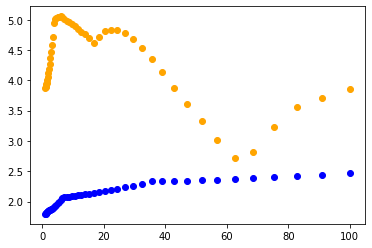

In [9]:
train = []
cv_err = []
for i in alphas:
    lr_reg = Lasso(alpha=i, max_iter=10000)
    lr_reg.fit(p10, y)
    train_this = mean_squared_error(lr_reg.predict(p10), y, squared=False) 
    train.append(train_this)
    
    scores = cross_val_score(Lasso(alpha=i, max_iter=10000), p10, y, cv=10 , scoring = 'neg_root_mean_squared_error')
    cv_err_this = -np.mean(scores)
    cv_err.append(cv_err_this)

fig, axes = plt.subplots(figsize=(6, 4))
axes.scatter(alphas,train, color='blue')
axes.scatter(alphas,cv_err, color='orange')

best_regularization_parametr = grid_result.best_estimator_.alpha
rmse = mean_squared_error(grid_result.predict(p), y, squared=False)
print("Best regularization parameter:", best_regularization_parametr)
print("RMSE for the best Ridge regression predictor:", rmse)

RMSE for the best Ridge regression predictor: 4.732765820373989


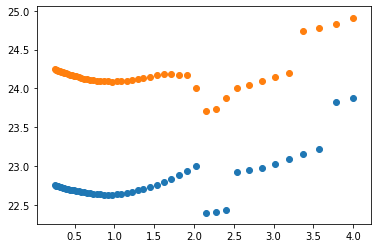

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338.6825895485082, tolerance: 0.38165062314629467
  model = cd_fast.enet_coordinate_descent(


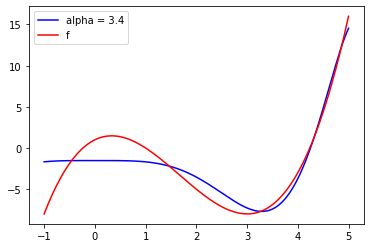

In [10]:
best_regularization_parametr = grid_result.best_estimator_.alpha
Lasso_reg = Lasso(alpha=best_regularization_parametr, max_iter=10000)
Lasso_reg.fit(p10, y)
predicator = Lasso_reg.predict(p10)

fig, axes = plt.subplots(figsize=(6, 4))
axes.plot(x,predicator, color = 'blue')
axes.plot(x,y_unperturbed, color = 'red')
axes.legend(['alpha = '+str(round(best_regularization_parametr,1)),'f'])

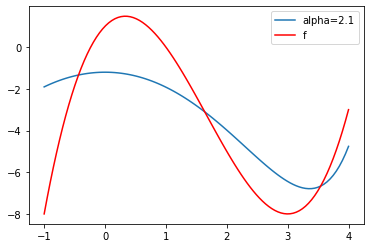

## Elastic net
Objective function in scikit-learn: 
$$ \frac{1}{2}L_S(h)+\alpha r \|\mathbf w\|_1+\frac{1}{2}\alpha(1-r)\|\mathbf{w}\|_2^2.$$
**8. Fix some large $d$ and use `GridSearchCV` to find the best combination of $\alpha$ and $r$ (`l1_ratio`).**

In [11]:
from sklearn.linear_model import ElasticNet

s = np.linspace(0,1,11)

alphas=np.logspace(0,3,50,endpoint=True)
alphas_grid = {'alpha' : alphas, 'l1_ratio' : s }

grid = GridSearchCV(estimator=ElasticNet(), param_grid=alphas_grid, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
grid_result = grid.fit(p10, y)

best_regularization_parametr = grid_result.best_estimator_.alpha
rmse = mean_squared_error(grid_result.predict(p), y, squared=False)
print("Best regularization parameter:", best_regularization_parametr)
print("RMSE for the best Ridge regression predictor:", rmse)

best_estimator = grid_result.best_estimator_
print("Best estimator:", best_estimator)

Fitting 5 folds for each of 550 candidates, totalling 2750 fits
Best regularization parameter: 4.094915062380426
RMSE for the best Ridge regression predictor: 1.924091367868239
Best estimator: ElasticNet(alpha=4.094915062380426, l1_ratio=0.8)


C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401.1464496363185, tolerance: 0.38165062314629467
  model = cd_fast.enet_coordinate_descent(


best parameters: {'alpha': 2.519842099789746, 'l1_ratio': 0.7777777777777777, 'tol': 0.5}
Best Estimator: ElasticNet(alpha=2.519842099789746, copy_X=True, fit_intercept=True,
           l1_ratio=0.7777777777777777, max_iter=1000, normalize=False,
           positive=False, precompute=False, random_state=None,
           selection='cyclic', tol=0.5, warm_start=False)
RMSE for the best papameters: 4.870019852147862


**9. Show the graphs of the best predictor along with the graph of the unperturbed original function.**

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401.1464496363185, tolerance: 0.38165062314629467
  model = cd_fast.enet_coordinate_descent(


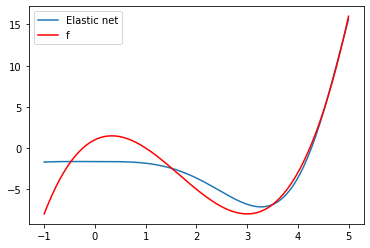

In [12]:
best_regularization_parametr = grid_result.best_estimator_.alpha
l1_ratio = grid_result.best_estimator_.l1_ratio
Elastic = ElasticNet(alpha=best_regularization_parametr, l1_ratio=l1_ratio)

Elastic.fit(p, y)
predicator = Elastic.predict(p)

fig, axes = plt.subplots(figsize=(6, 4))
axes.plot(x,predicator)
axes.plot(x,y_unperturbed, color = 'red')
axes.legend(['Elastic net','f'])

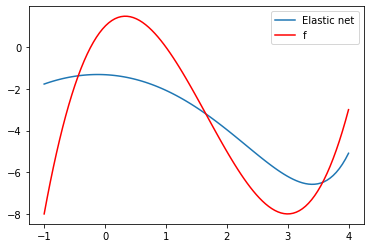

**10. Show the coefficients of the best Lasso and ElasticNet predictors**

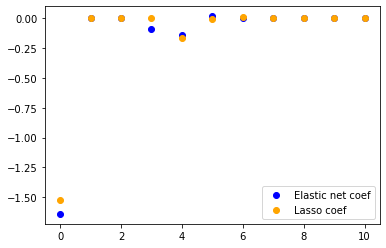

In [13]:
Lasso_values = []
Lasso_values.extend([Lasso_reg.intercept_])
Lasso_values.extend(Lasso_reg.coef_)

Elastic_values = []
Elastic_values.extend([Elastic.intercept_])
Elastic_values.extend(Elastic.coef_)

n = np.arange(0,11)

fig, axes = plt.subplots(figsize=(6, 4))
axes.scatter(n,Elastic_values, color ='blue')
axes.scatter(n,Lasso_values, color ='orange')
axes.legend(['Elastic net coef','Lasso coef'],loc = 4)

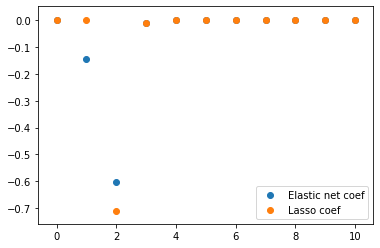